# Feature Trends & Importance Using Linear Regression

# Initialization

Goals:
Load data; drop rows and columns with excessive NaN values; 

### Load data, pre-processing, imputation of missing values

In [4]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Read in data with outliers removed. 
df = pd.read_excel('OutliersRemoved2.xlsx', parse_cols='C,G:CM')

In [26]:
# What is the shape of the loaded data? 
df.shape

(7524, 86)

In [7]:
#Drop rows and columns with too many NaNs
df = df.dropna(thresh=5000, axis='columns') #Drop columns that have at least 3000 non-NaN values
df = df.dropna(how='any', thresh=40) # Rows/observations should have at least 30 non-NaN values 

#Shape of the refined data
df.shape

(5360, 48)

In [8]:
#Check: how many remaining null values are there for each feature?
#df.isnull().sum()

#Show the features with null values as a percent of the total values
#df.isnull().sum()/len(df)

# Table below shows acceptable values for missing data (feature with highest missing data is ~14%)
# Imputing NaN values with the mean average of each column is more reliable with less missing data. 

In [9]:
# Create a dataframe with the NaN values filled in with the mean of column features
df_og = df.fillna(df.mean())    

In [10]:
#df_og.columns

## Generate Hypotheses
Generate some hypotheses based on feature correlation/logical similarity

### Quality Standards vs Water Use, Wages, and Population Size

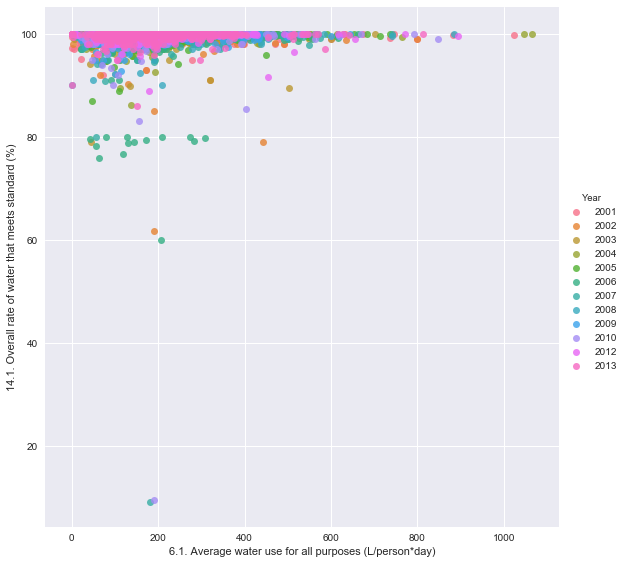

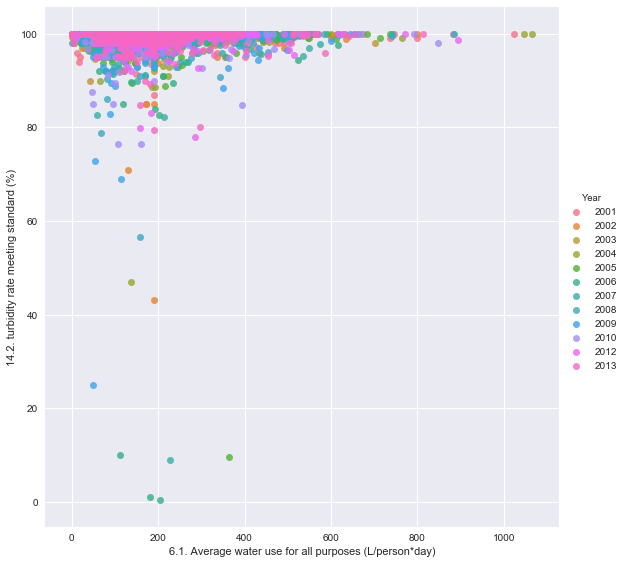

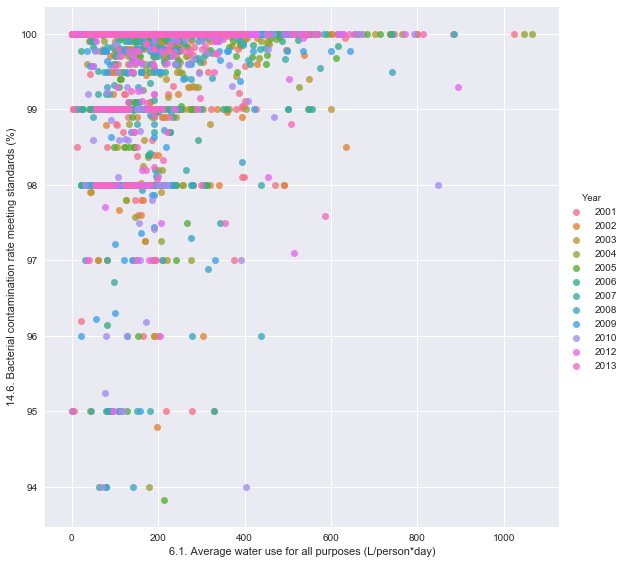

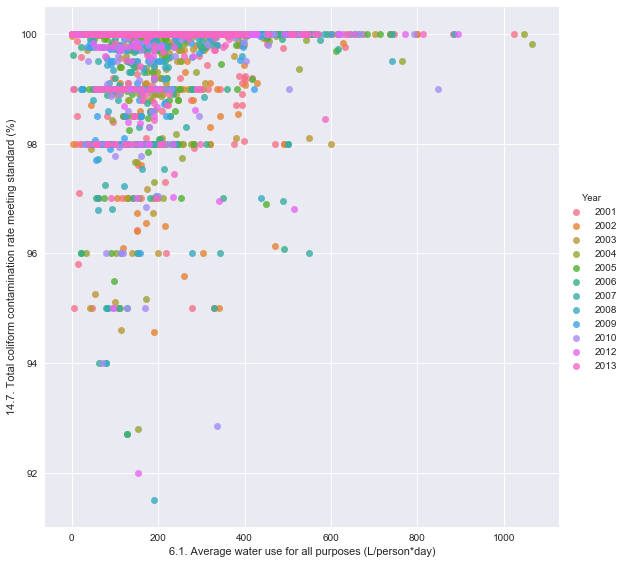

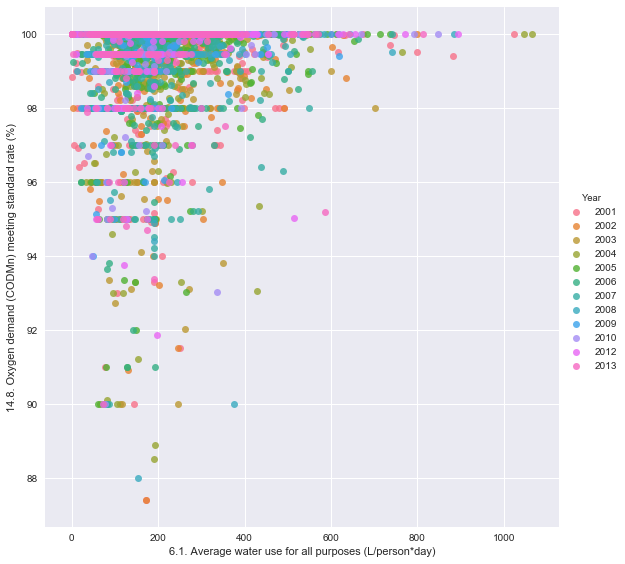

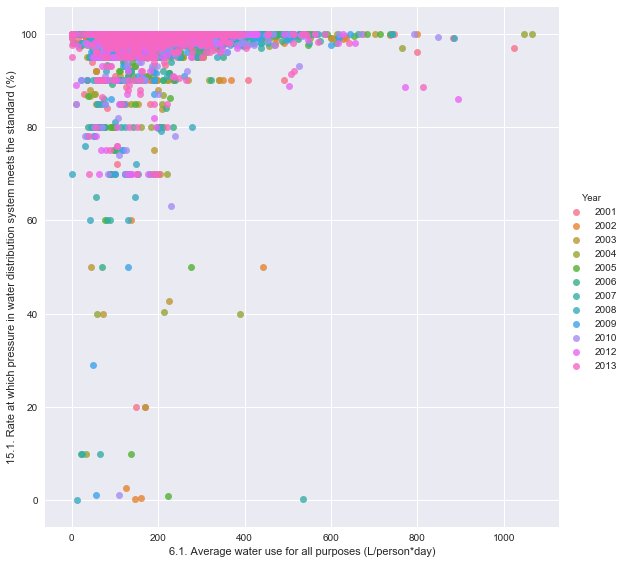

In [11]:
# Provinces that use less water tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']

for y in Y:
    x = '6.1. Average water use for all purposes (L/person*day)'
    sns.lmplot(x,y, data=df_og, hue = 'Year', truncate=True, size=8, fit_reg=False)
    plt.show()

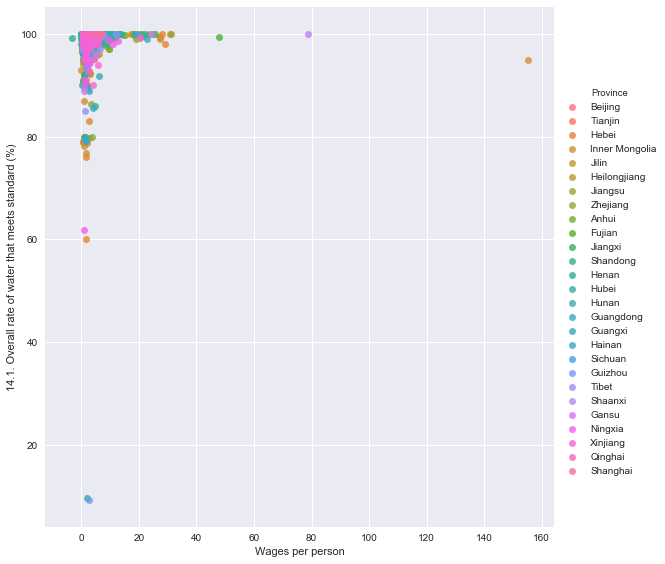

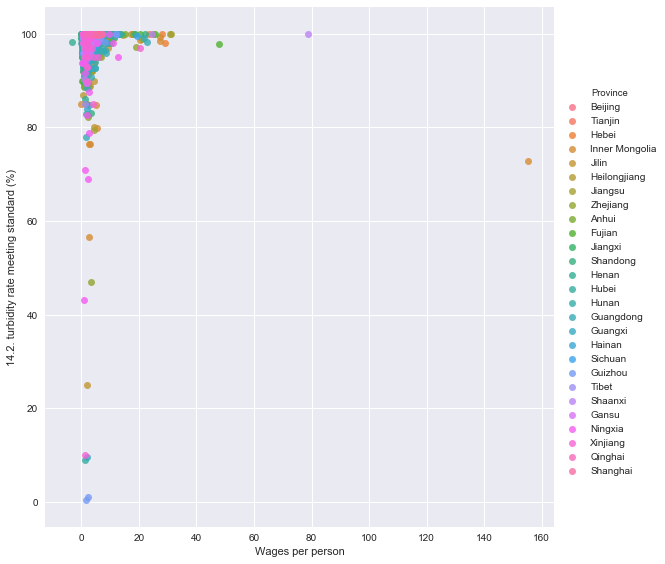

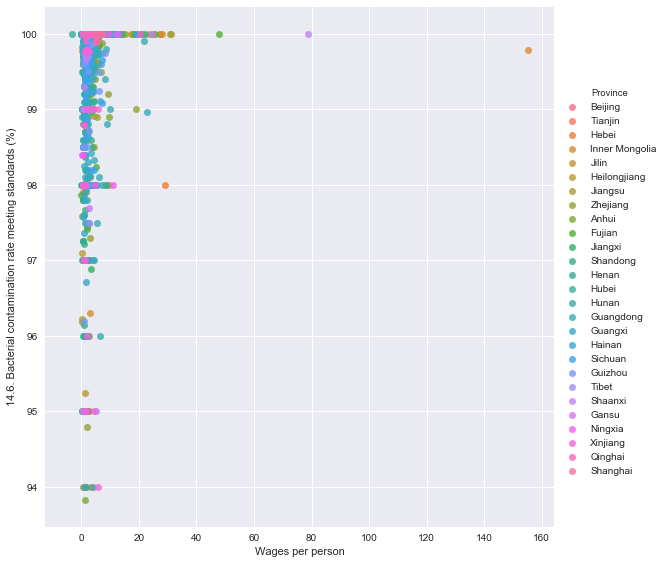

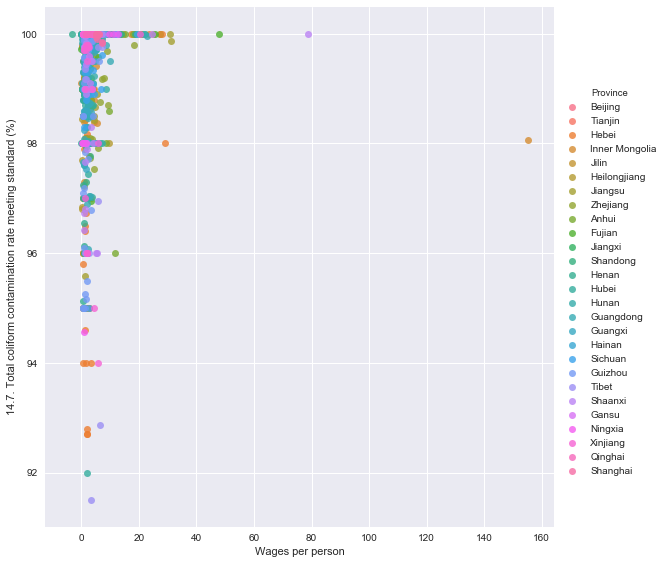

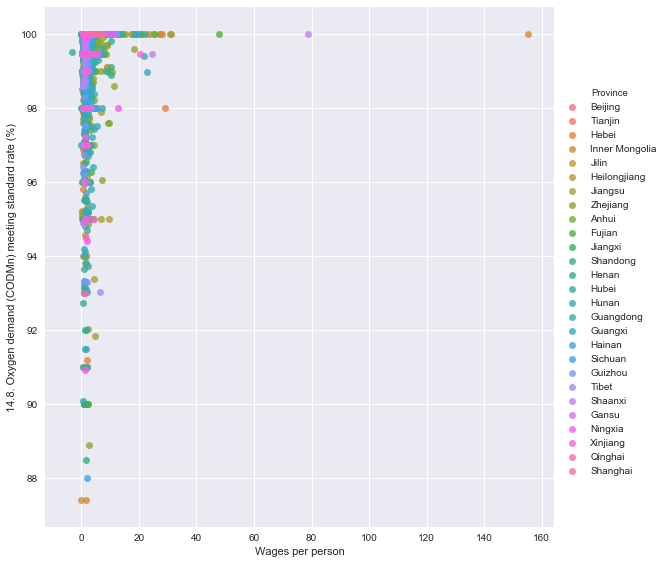

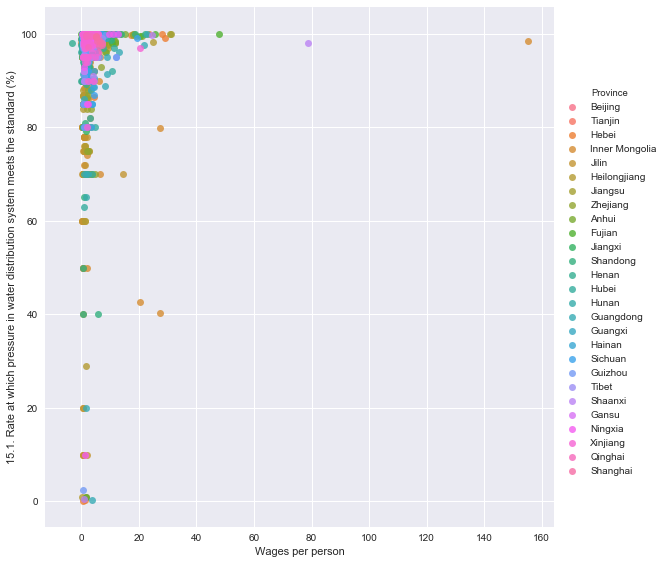

In [12]:
# Provinces with lower wages per employee tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']
df_og['Wages per person'] = df_og['24. Total wages (10,000 yuan)']/df_og['25.1. Total employees (persons)']
for y in Y:
    x = 'Wages per person'
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=8, fit_reg=False)
    plt.show()

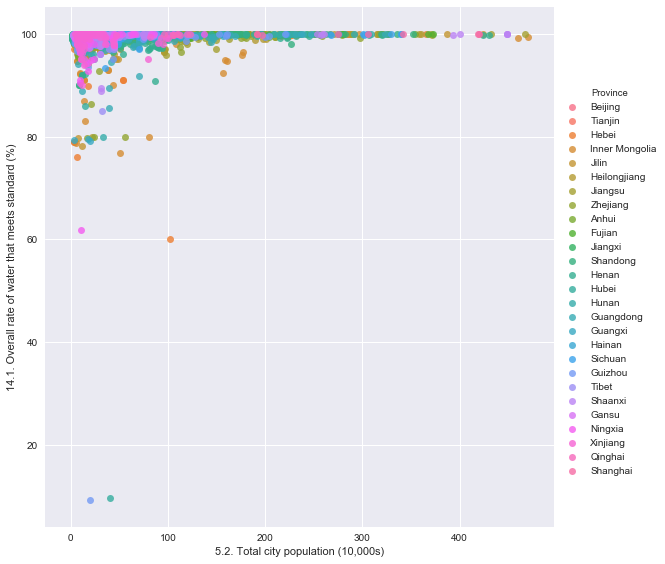

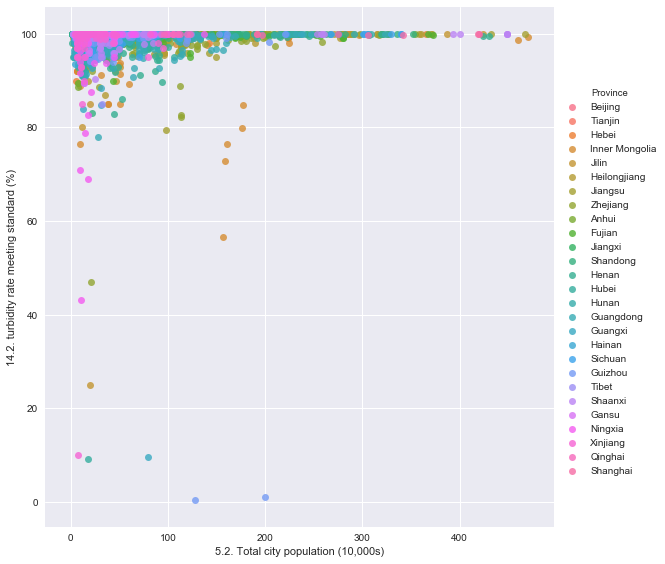

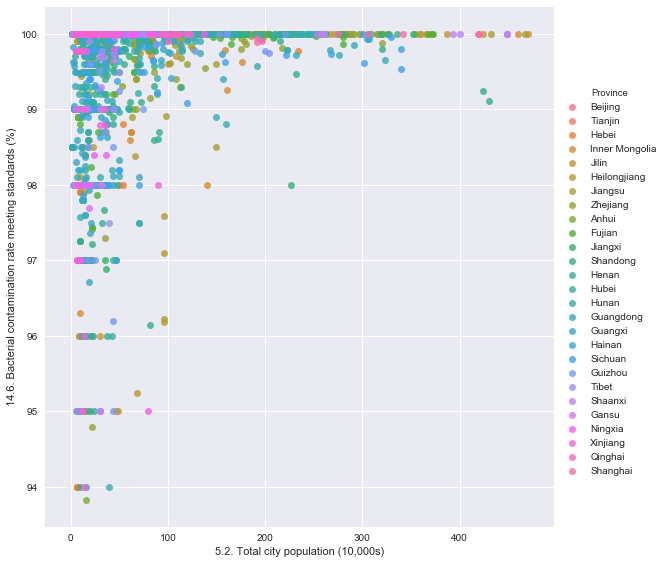

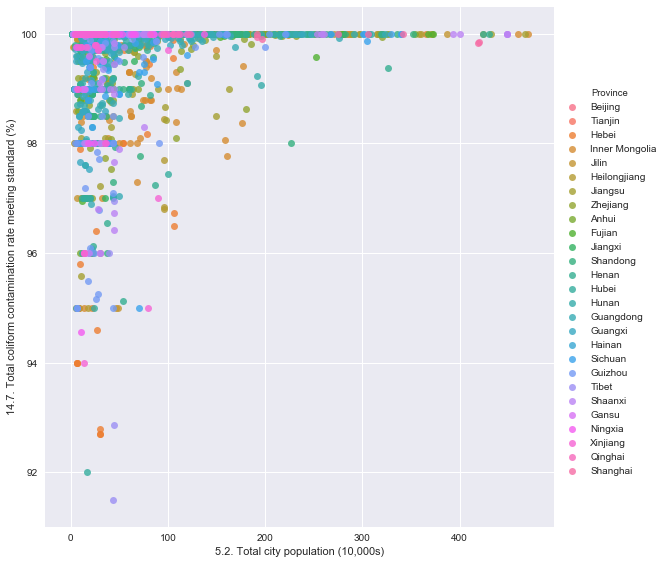

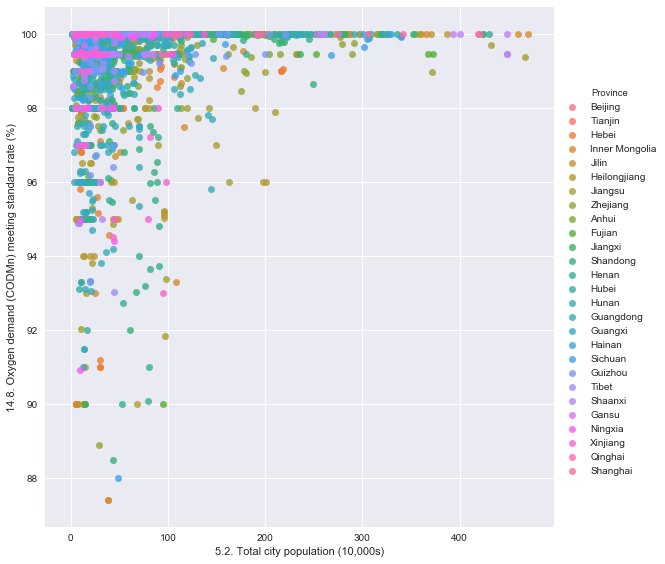

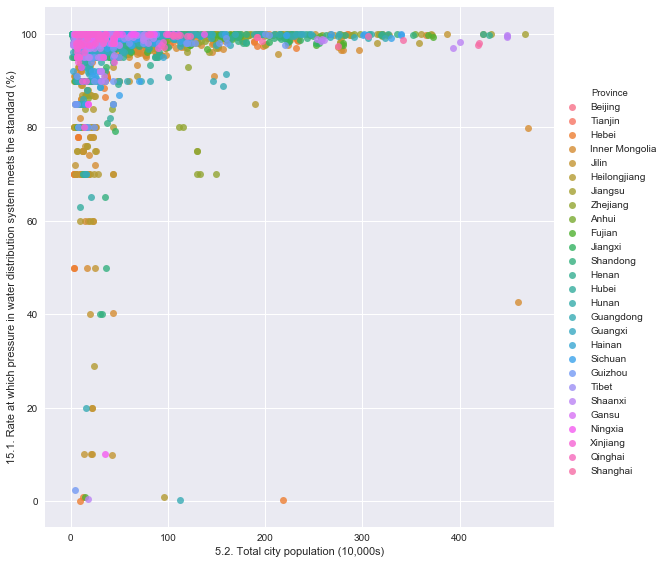

In [13]:
# Provinces with lower population tend to have lower quality standards
Y = ['14.1. Overall rate of water that meets standard (%)',
       '14.2. turbidity rate meeting standard (%)',
       '14.6. Bacterial contamination rate meeting standards (%)',
       '14.7. Total coliform contamination rate meeting standard (%)',
       '14.8. Oxygen demand (CODMn) meeting standard rate (%)',
       '15.1. Rate at which pressure in water distribution system meets the standard (%)']

for y in Y:
    x = '5.2. Total city population (10,000s)'
    sns.lmplot(x,y, data=df_og, hue = 'Province', truncate=True, size=8, fit_reg=False)
    plt.show()

# Using Linear Regression to Understand Feature Importance

Here we run a linear regression for each feature in our dataset against all other features

In [14]:
# Linear regression using normalized data - columns are the Y, rows are X

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = df_og.drop(['Province','Year'],axis=1).copy()

df_scaled = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)

lm = linear_model.LinearRegression()
out = pd.DataFrame(data=np.nan, index=df.columns, columns=df.columns)
for y in df.columns:
    lm.fit(df.drop(y,axis=1),df[y])
    d = dict(zip(df.drop(y,axis=1).columns,lm.coef_))
    for x in df.drop(y,axis=1).columns:
        out.loc[x,y] = d[x]
out

,"1.1. Total production capacity (10,000 cubic metres/day)",1.3. Number of plants (units),"2.1. Total water supply volume / year (10,000 cubic metres/year)","2.2. Average supply per day (10,000 cubic metres/day)","2.3. Maximum supplied in a day (10,000 cubic metres/day)","3.1. Total Volume of water sold (10,000 cubic metres/year)","3.2. Of which Domestic/residential water (10,000 cubic metres/year)","3.4. Of which Industrial (10,000 cubic metres/year)","3.5. Of which Commercial (10,000 cubic metres/year)",4. Water sold / water produced (%),...,"24. Total wages (10,000 yuan)",25.1. Total employees (persons),25.2. Of which On-duty workers,25.4. Of which professional and technical personnel,27.1. Residential drinking water Current price or standard (yuan/cubic meter),28.1. Administrative water Current price or standard (yuan/cubic meter),29.1. Industrial water Current price or standard (yuan/cubic meter),30.1. Business services water Current price or standard (yuan/cubic meter),32.1. Unit average water Current price or standard (yuan/cubic meter),Wages per person
"1.1. Total production capacity (10,000 cubic metres/day)",NaN,1.374947e-02,7.295705,6.966624e-02,2.072804e-01,3.102923,-1.452783,16.961730,1.599520,-6.642869e-05,...,3.998106,0.985892,0.083266,0.599094,6.267243e-05,5.554235e-04,-9.425324e-04,1.835781e-03,-1.383843e-03,-8.040113e-03
1.3. Number of plants (units),6.408901e-01,NaN,7.015835,-4.023650e-02,-1.352634e-01,-1.469512,54.538383,-33.682987,15.349359,2.171927e-03,...,-16.956780,9.311190,10.925600,0.189069,-3.333710e-03,4.323815e-03,-2.966595e-03,3.335419e-02,1.607627e-02,2.683482e-02
"2.1. Total water supply volume / year (10,000 cubic metres/year)",4.103228e-04,8.465257e-06,NaN,1.884495e-03,-2.255808e-04,0.464595,-0.013845,-0.008145,0.027964,-3.524348e-05,...,-0.016086,0.002100,0.000389,-0.001348,7.018430e-06,-7.041803e-06,-2.704626e-06,3.563532e-06,-4.819371e-06,3.341033e-05
"2.2. Average supply per day (10,000 cubic metres/day)",4.865688e-01,-6.028988e-03,234.022929,NaN,5.578904e-01,18.951954,10.779698,12.547390,4.729300,5.313972e-03,...,7.149124,-0.680709,-2.150047,-0.487058,-4.891920e-03,1.533287e-03,2.598847e-03,1.337270e-03,1.276931e-03,-1.850204e-02
"2.3. Maximum supplied in a day (10,000 cubic metres/day)",3.576829e-02,-5.007518e-04,-0.692123,1.378373e-02,NaN,0.064398,-1.827700,1.070478,0.098164,-1.241976e-04,...,0.143174,-0.094945,-0.030483,-0.003113,-1.964580e-04,-3.252104e-05,5.203738e-05,-5.777303e-05,-1.656069e-04,-2.148411e-04
"3.1. Total Volume of water sold (10,000 cubic metres/year)",1.265911e-04,-1.286197e-06,0.337014,1.107042e-04,1.522518e-05,NaN,0.217268,0.049340,0.020499,2.702810e-05,...,-0.042230,0.000358,0.004699,0.000972,1.462098e-06,-1.450526e-06,5.200970e-06,2.482172e-06,-6.230099e-06,7.570966e-05
"3.2. Of which Domestic/residential water (10,000 cubic metres/year)",-1.349437e-04,1.086817e-04,-0.022865,1.433628e-04,-9.838229e-04,0.494670,NaN,0.005214,0.011854,-7.688496e-06,...,0.034316,-0.001239,0.001115,-0.004488,4.361510e-06,3.565971e-06,-1.176825e-05,-2.576214e-05,-2.133286e-05,-3.677335e-05
"3.4. Of which Industrial (10,000 cubic metres/year)",2.372609e-03,-1.010808e-04,-0.020259,2.512971e-04,8.677487e-04,0.169169,0.007852,NaN,-0.058133,1.850135e-06,...,-0.068121,0.003384,-0.004453,0.003154,1.754086e-05,-8.526652e-06,-7.758995e-06,3.997773e-05,1.855876e-05,1.319634e-04
"3.5. Of which Commercial (10,000 cubic metres/year)",1.167289e-03,2.403153e-04,0.362854,4.941557e-04,4.151463e-04,0.366688,0.093135,-0.303287,NaN,1.640286e-05,...,0.151705,-0.004184,-0.025143,0.010284,-2.688734e-05,1.494506e-05,6.018442e-06,-1.038771e-04,9.702085e-06,-2.125131e-04
4. Water sold / water produced (%),-8.897962e-02,6.241404e-02,-839.373335,1.019136e+00,-9.640687e-01,887.397514,-110.872622,17.716680,30.106873,NaN,...,23.480582,12.115723,-9.830332,-4.467504,1.747556e-02,-3.405853e-02,-1.124148e-02,-6.975181e-02,-5.752909e-02,1.571356e-01


In [15]:
df_scaled.shape

(5360, 47)

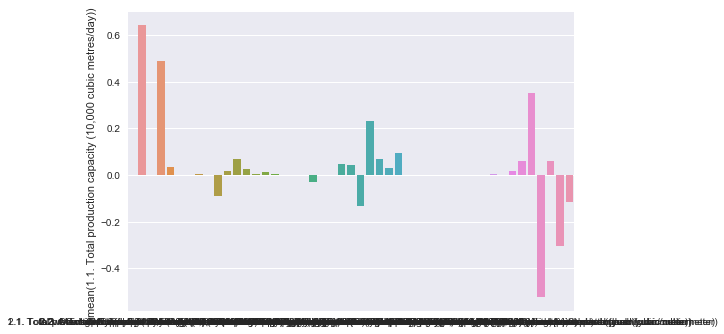

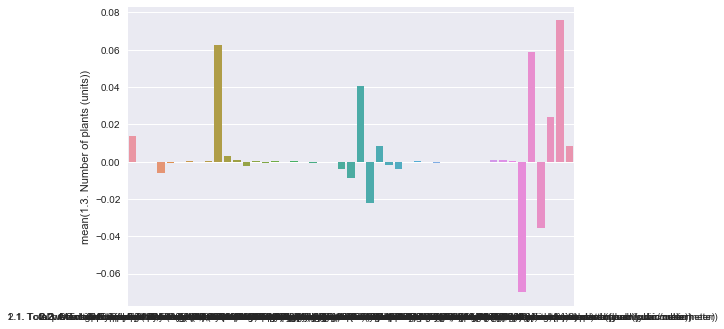

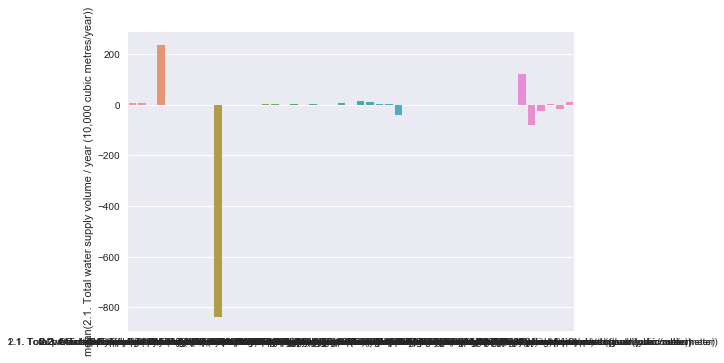

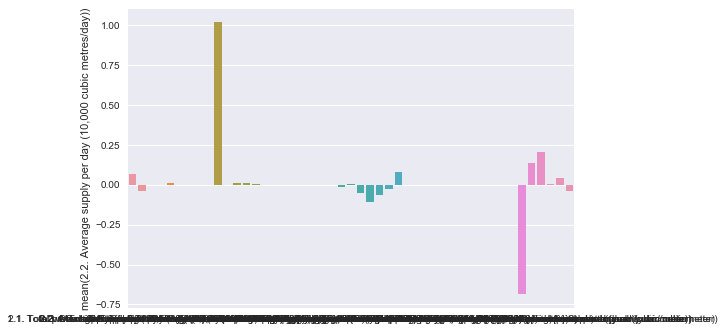

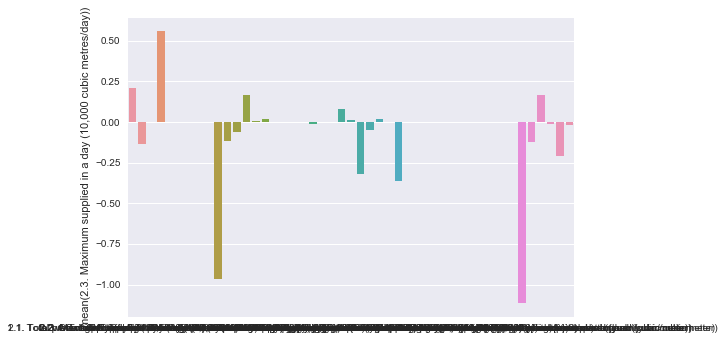

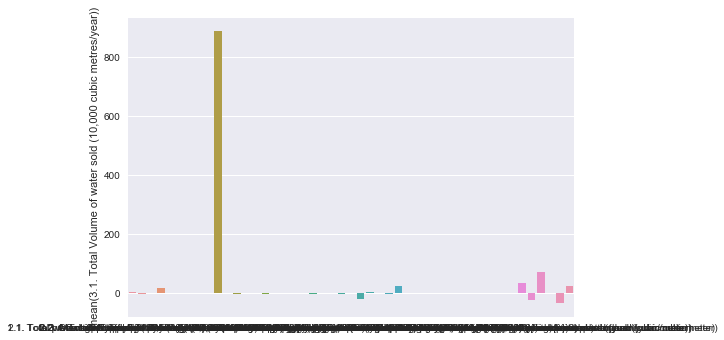

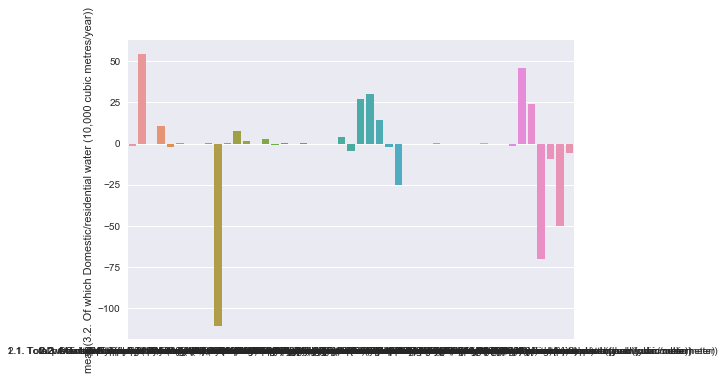

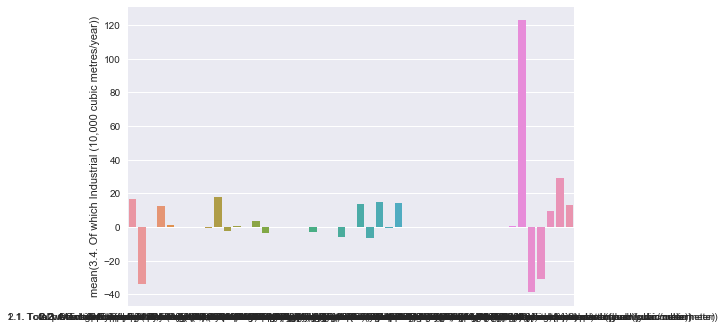

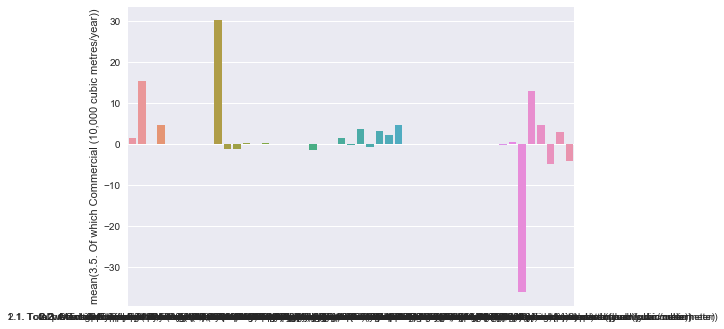

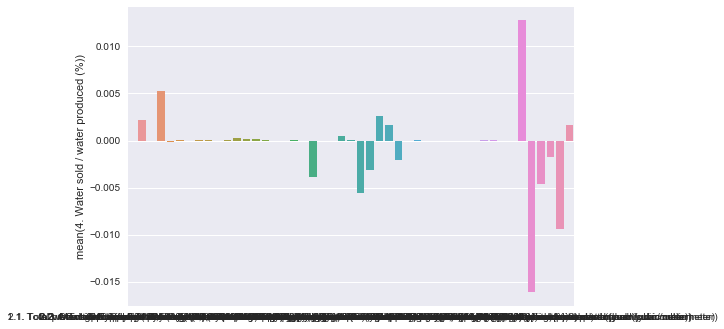

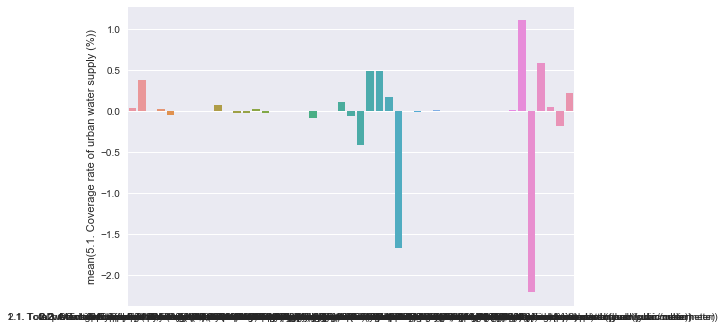

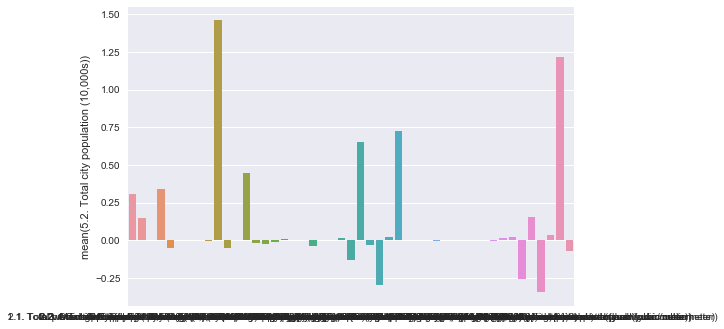

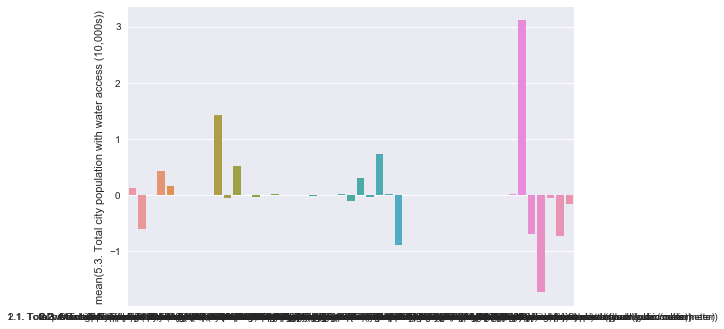

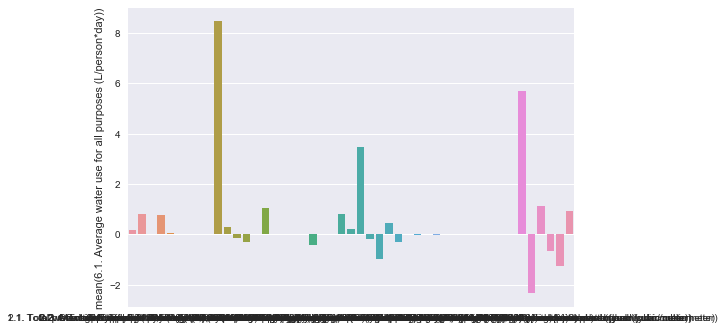

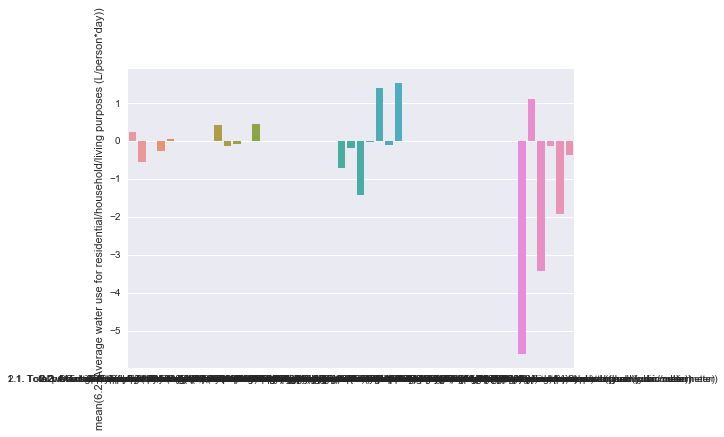

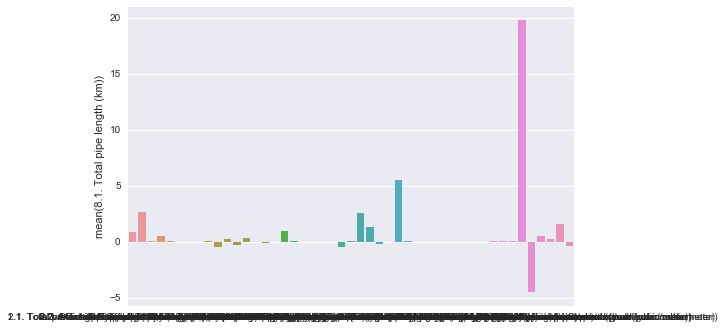

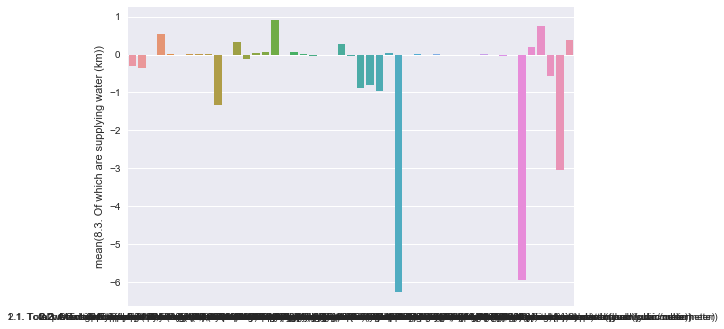

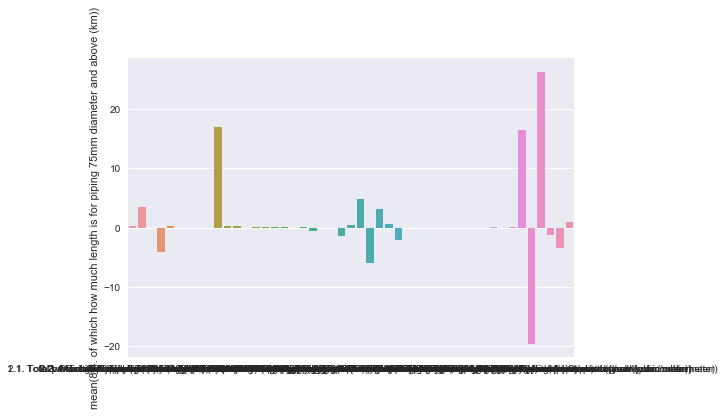

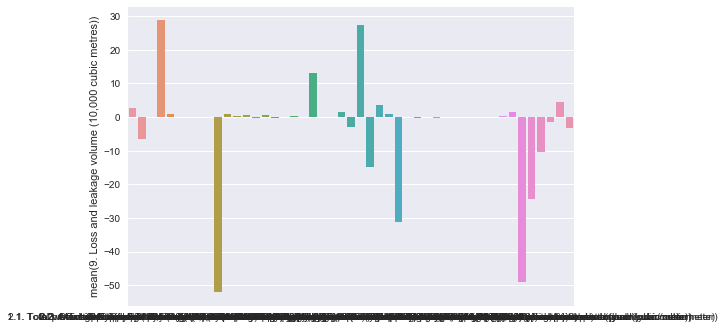

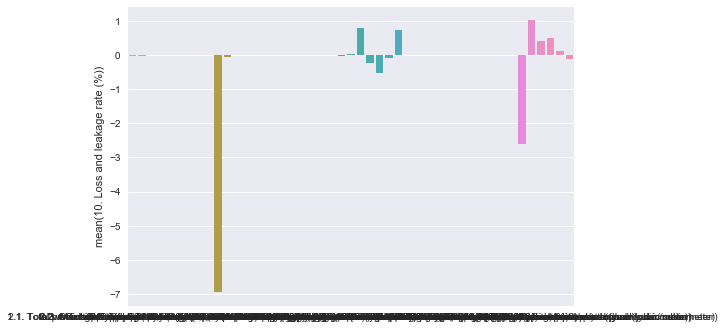

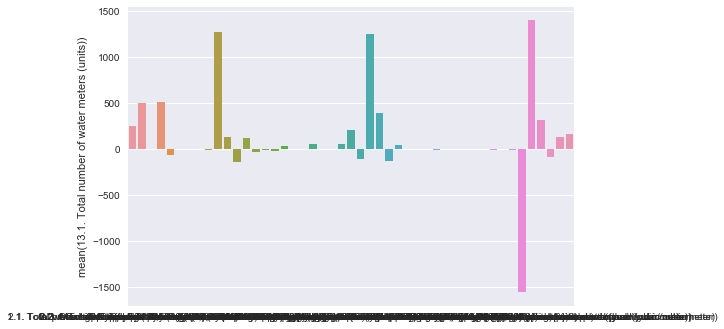

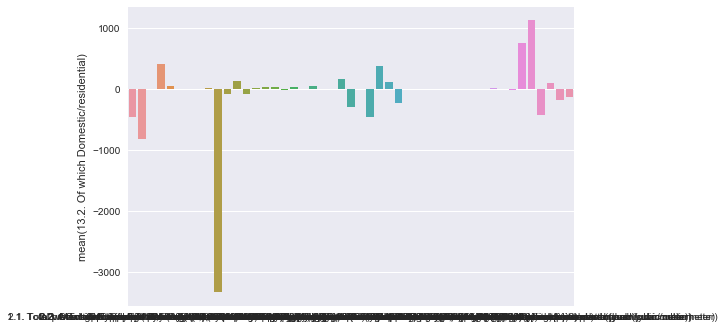

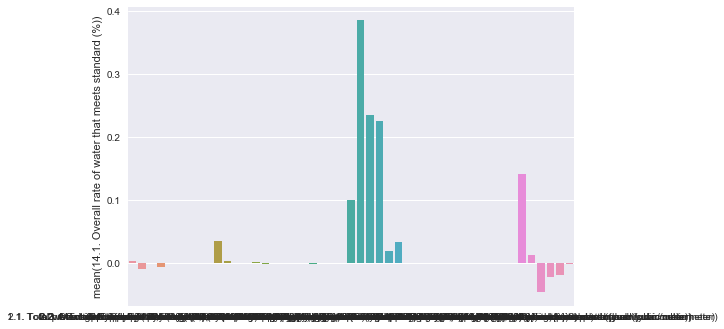

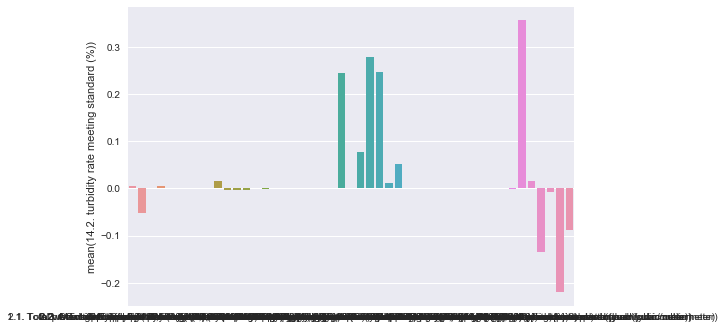

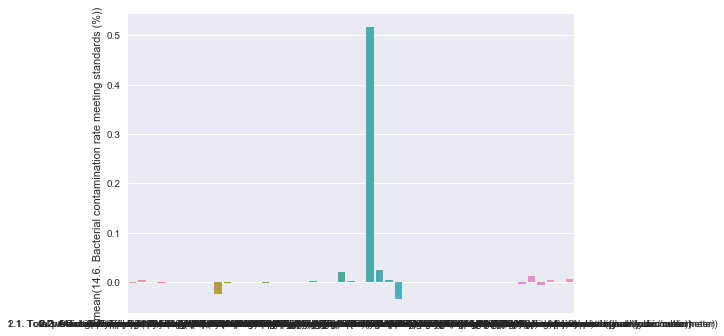

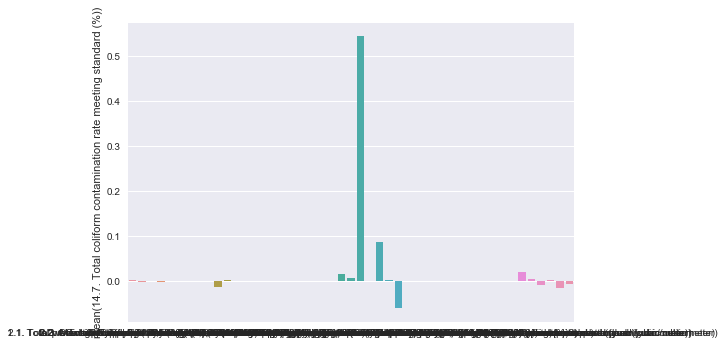

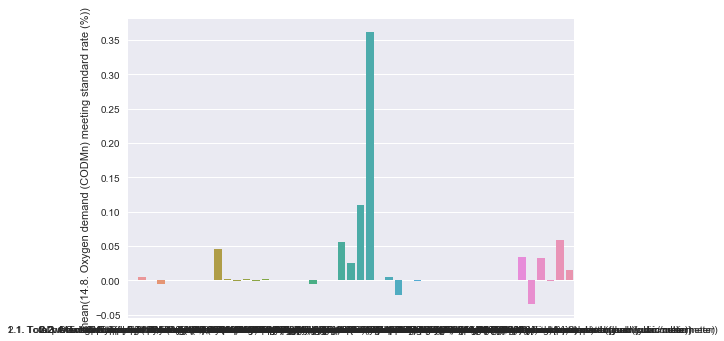

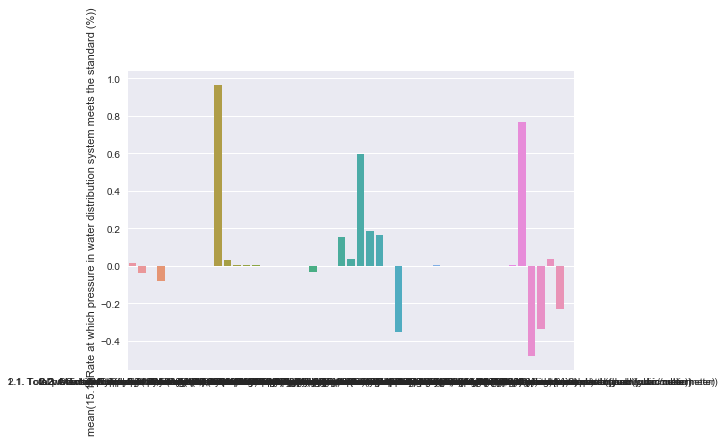

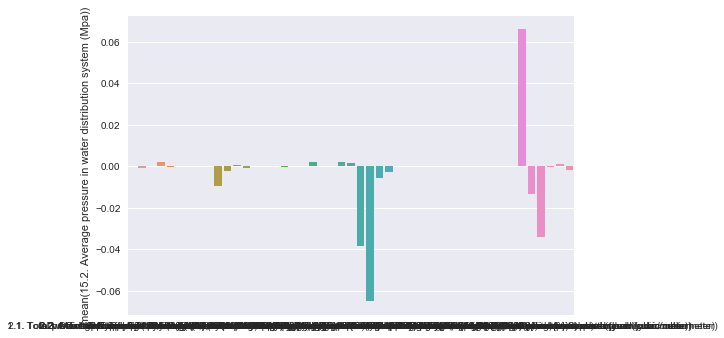

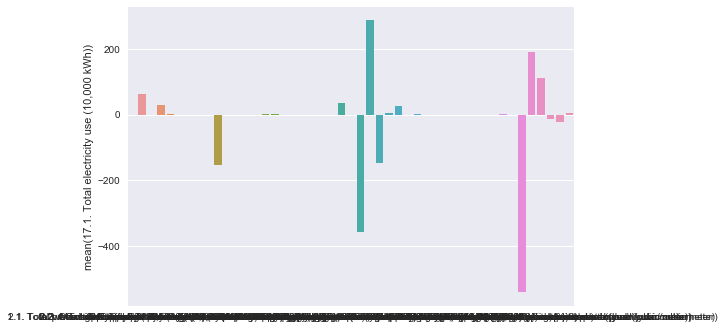

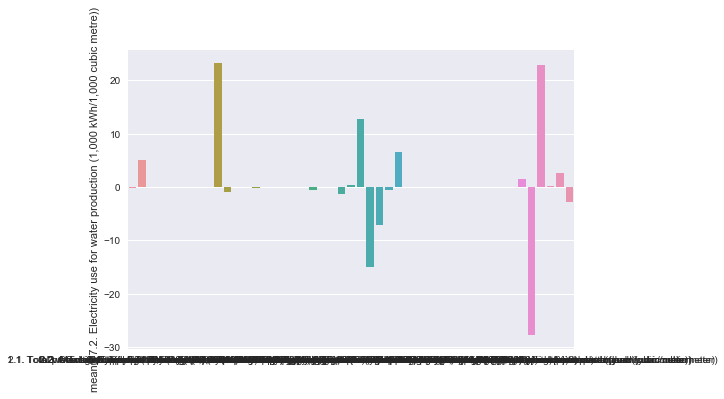

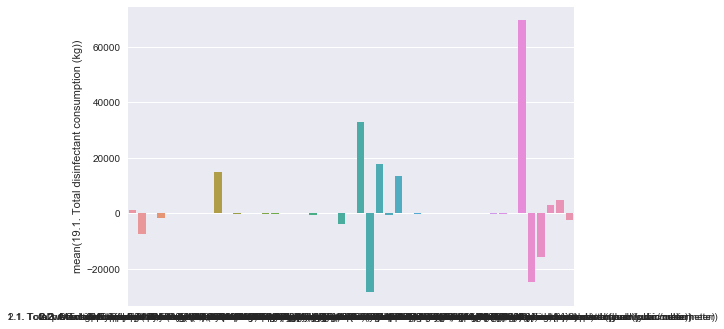

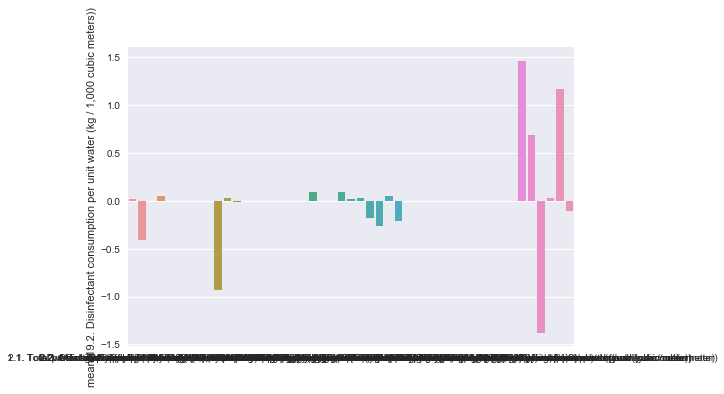

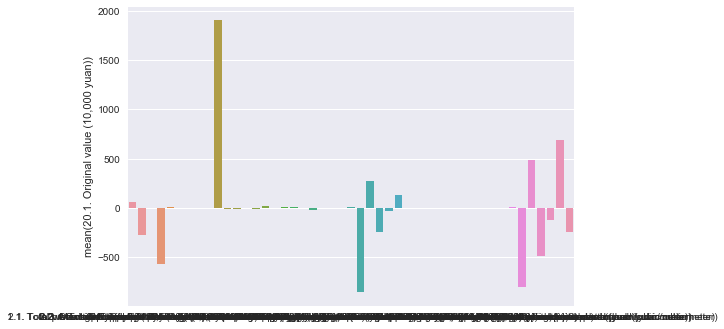

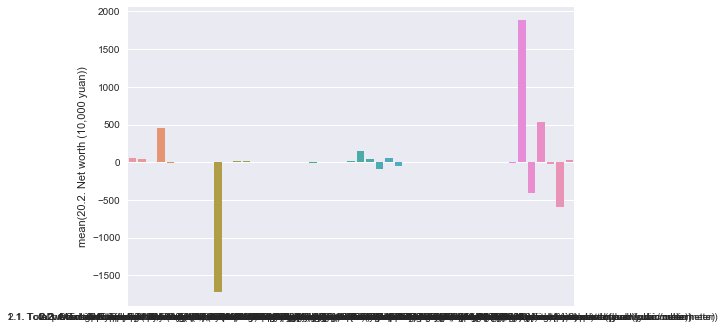

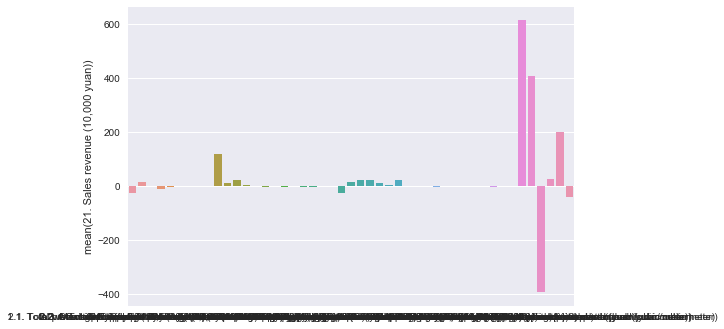

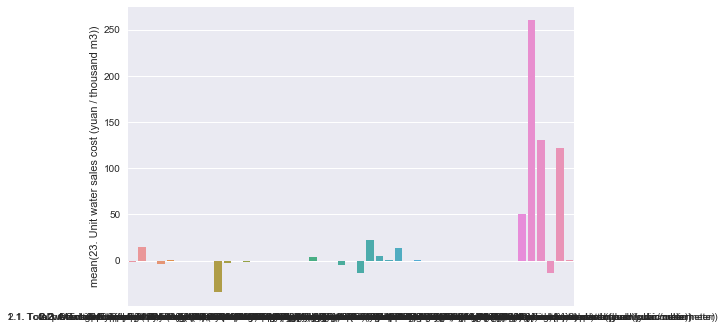

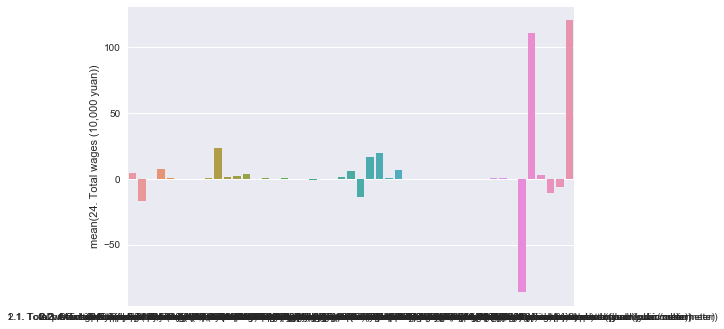

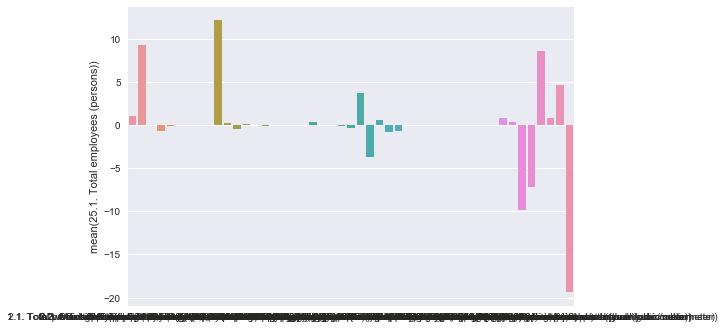

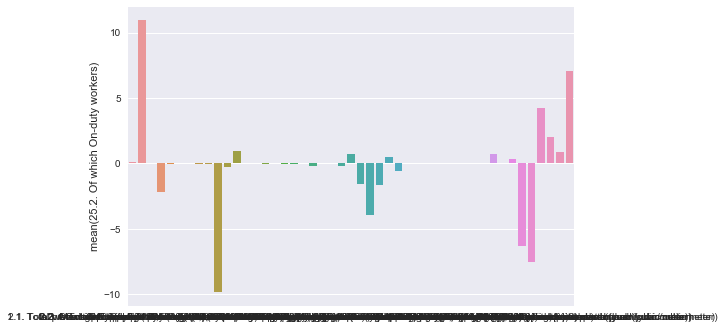

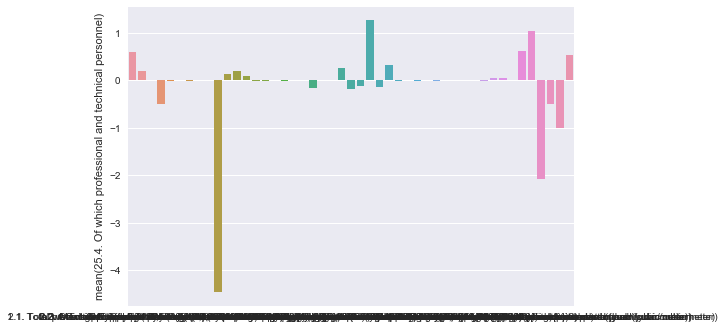

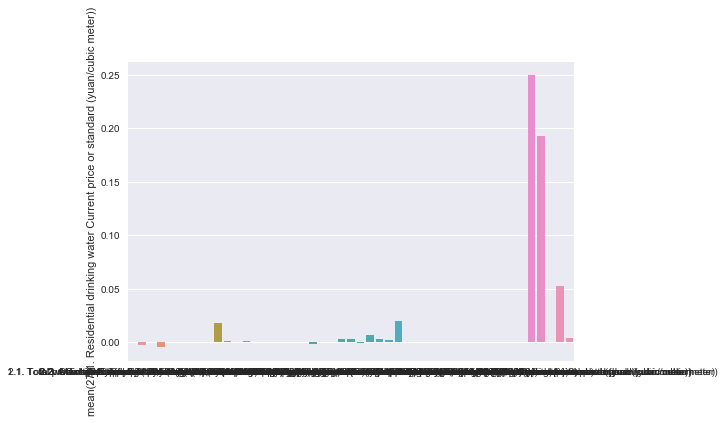

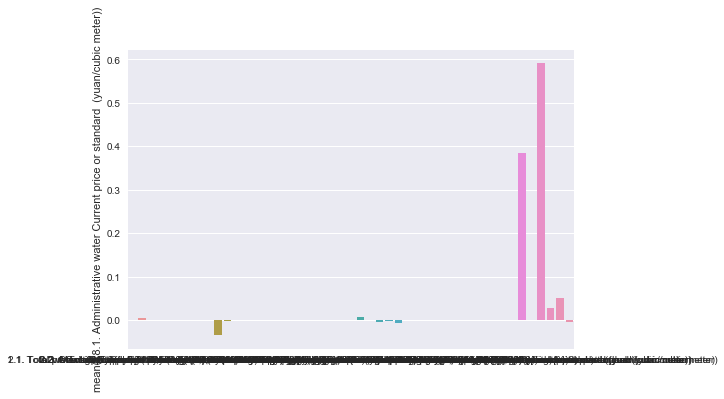

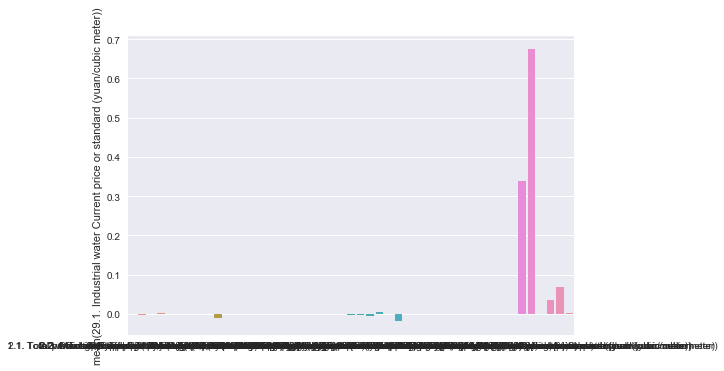

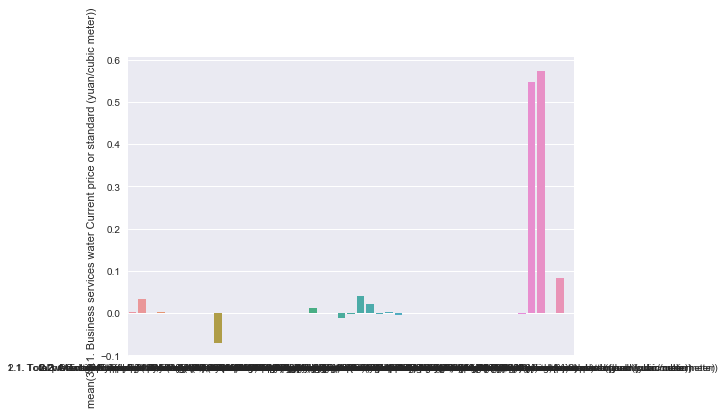

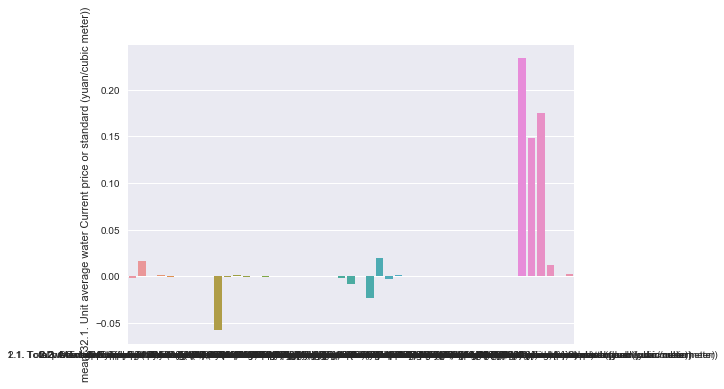

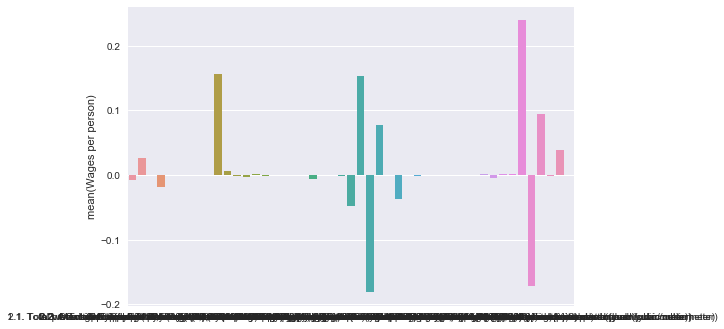

In [16]:
#plot each column
for idx in out.columns:
    sns.barplot(x=out.index,y=out[idx])
    plt.show()

In [17]:
# find max coefficient for each variable
pd.DataFrame(out.idxmax())

,0
"1.1. Total production capacity (10,000 cubic metres/day)",1.3. Number of plants (units)
1.3. Number of plants (units),32.1. Unit average water Current price or stan...
"2.1. Total water supply volume / year (10,000 cubic metres/year)","2.2. Average supply per day (10,000 cubic metr..."
"2.2. Average supply per day (10,000 cubic metres/day)",4. Water sold / water produced (%)
"2.3. Maximum supplied in a day (10,000 cubic metres/day)","2.2. Average supply per day (10,000 cubic metr..."
"3.1. Total Volume of water sold (10,000 cubic metres/year)",4. Water sold / water produced (%)
"3.2. Of which Domestic/residential water (10,000 cubic metres/year)",1.3. Number of plants (units)
"3.4. Of which Industrial (10,000 cubic metres/year)",27.1. Residential drinking water Current price...
"3.5. Of which Commercial (10,000 cubic metres/year)",4. Water sold / water produced (%)
4. Water sold / water produced (%),27.1. Residential drinking water Current price...


In [18]:
# find most indicative variable for all other variables
l = list(out.idxmax().values)
counted = pd.DataFrame([[x,l.count(x)] for x in set(l)])
counted.sort_values(by=1,ascending=False)

,0,1
6,27.1. Residential drinking water Current price...,13
9,4. Water sold / water produced (%),9
0,28.1. Administrative water Current price or st...,6
11,14.7. Total coliform contamination rate meetin...,4
3,1.3. Number of plants (units),3
7,"2.2. Average supply per day (10,000 cubic metr...",3
10,29.1. Industrial water Current price or standa...,3
2,14.6. Bacterial contamination rate meeting sta...,2
1,32.1. Unit average water Current price or stan...,1
4,15.2. Average pressure in water distribution s...,1


## Visualizing the Price of Residential Drinking Water

As the most important feature, per our linear regression output above, we look at how the price of residential drinking water is distributed and how it has changed over time

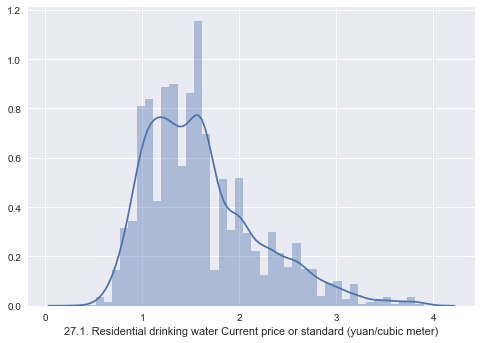

In [19]:
x='27.1. Residential drinking water Current price or standard (yuan/cubic meter)'
sns.distplot(df[x])
plt.show()

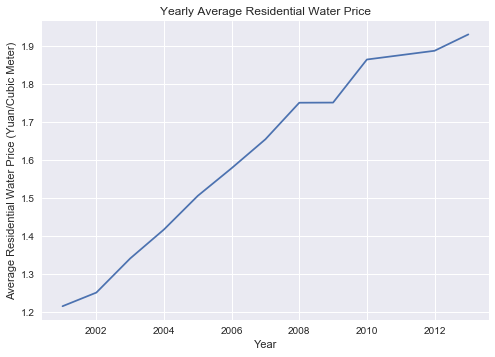

In [20]:
years = df_og.groupby(['Year']).mean()[x]#.sort_values(ascending=False)
plt.plot(years)
plt.title('Yearly Average Residential Water Price')
plt.ylabel('Average Residential Water Price (Yuan/Cubic Meter)')
plt.xlabel('Year')
plt.show()

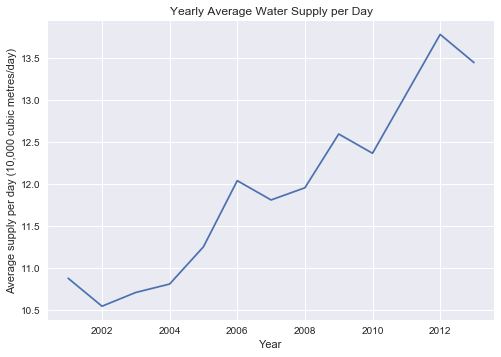

In [21]:
years = df_og.groupby('Year').mean()['2.2. Average supply per day (10,000 cubic metres/day)']#.sort_values(ascending=False)
plt.plot(years)
plt.title('Yearly Average Water Supply per Day')
plt.ylabel('Average supply per day (10,000 cubic metres/day)')
plt.xlabel('Year')
plt.show()